In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import pandas as pd
from zipfile import ZipFile
from visualizations import plot_geopandas, plot_correlation, plot_pie
from constants import BRAZIL_IDH
from matplotlib import pyplot as plt
from pense_dict import PENSE_DICT

PENSE_DATA = Path('../data/processed/PENSE_2019/all.zip').resolve()
zip_pense = ZipFile(PENSE_DATA)
df = pd.read_csv(zip_pense.open(zip_pense.namelist()[0]), sep=",")

In [2]:
def plot_pie_pense(df_i, cod, ax=None, max_len_i=None):
    plot_pie(df_i, cod, title=PENSE_DICT.get_question(cod), desc_dict=PENSE_DICT.get_pv_dict(cod), ax=ax, max_len=max_len_i)

In [3]:
df

,REGIAO,UF,MUNICIPIO_CAP,TIPO_MUNIC,SITUACAO,DEP_ADMIN,ESFERA,ESCOLA,TURMA,ALUNO,...,E01P65A,E01P66A,E01P26A,E01P27A,ESTRATO,IND_EXPANSAO,PESO_ALUNO_FREQ,PESO_INICIAL,POSEST,TOTAIS_POSEST
0,4,41,0,2,1,1,2,6,1,32,...,1,1,4,1,4105,1,426.151134,528.161538,4100000PUB3,291839
1,2,22,2211001,1,1,1,2,11,1,22,...,1,1,4,1,2209,1,67.177191,59.068421,2211001PUB3,27069
2,4,42,4205407,1,1,2,4,29,2,1,...,1,1,1,2,4207,1,12.821063,8.400000,4205407PRI2,1672
3,1,15,0,2,1,2,4,28,1,4,...,2,1,4,2,1501,1,37.246688,37.575758,1500000PRI3,15303
4,4,42,0,2,1,1,2,6,1,11,...,1,2,4,2,4205,1,269.621621,265.688259,4200000PUB3,198072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159240,4,41,0,2,1,2,4,6,1,16,...,1,2,4,2,4102,1,26.941630,31.650000,4100000PRI1,29210
159241,3,32,3205309,1,1,2,4,11,4,4,...,1,4,4,2,3207,1,1.465388,1.411290,3205309PRI2,1386
159242,4,42,4205407,1,1,1,2,1,4,18,...,1,1,1,2,4210,1,21.034621,21.666667,4205407PUB3,11408
159243,5,51,5103403,1,1,1,2,9,3,20,...,1,3,2,1,5112,1,42.125462,43.125000,5103403PUB3,19593


In [4]:
PENSE_DICT.get_pv_dict('B01003')

{1: 'Menos de 13 anos',
 2: '13 a 15 anos',
 3: '16 ou 17 anos',
 4: '18 anos ou mais',
 9: 'Sem resposta'}

# Caracterização dos dados

In [5]:
print("O dataset PENSE possui {} linhas e {} colunas (features).".format(*df.shape))

O dataset PENSE possui 159245 linhas e 306 colunas (features).


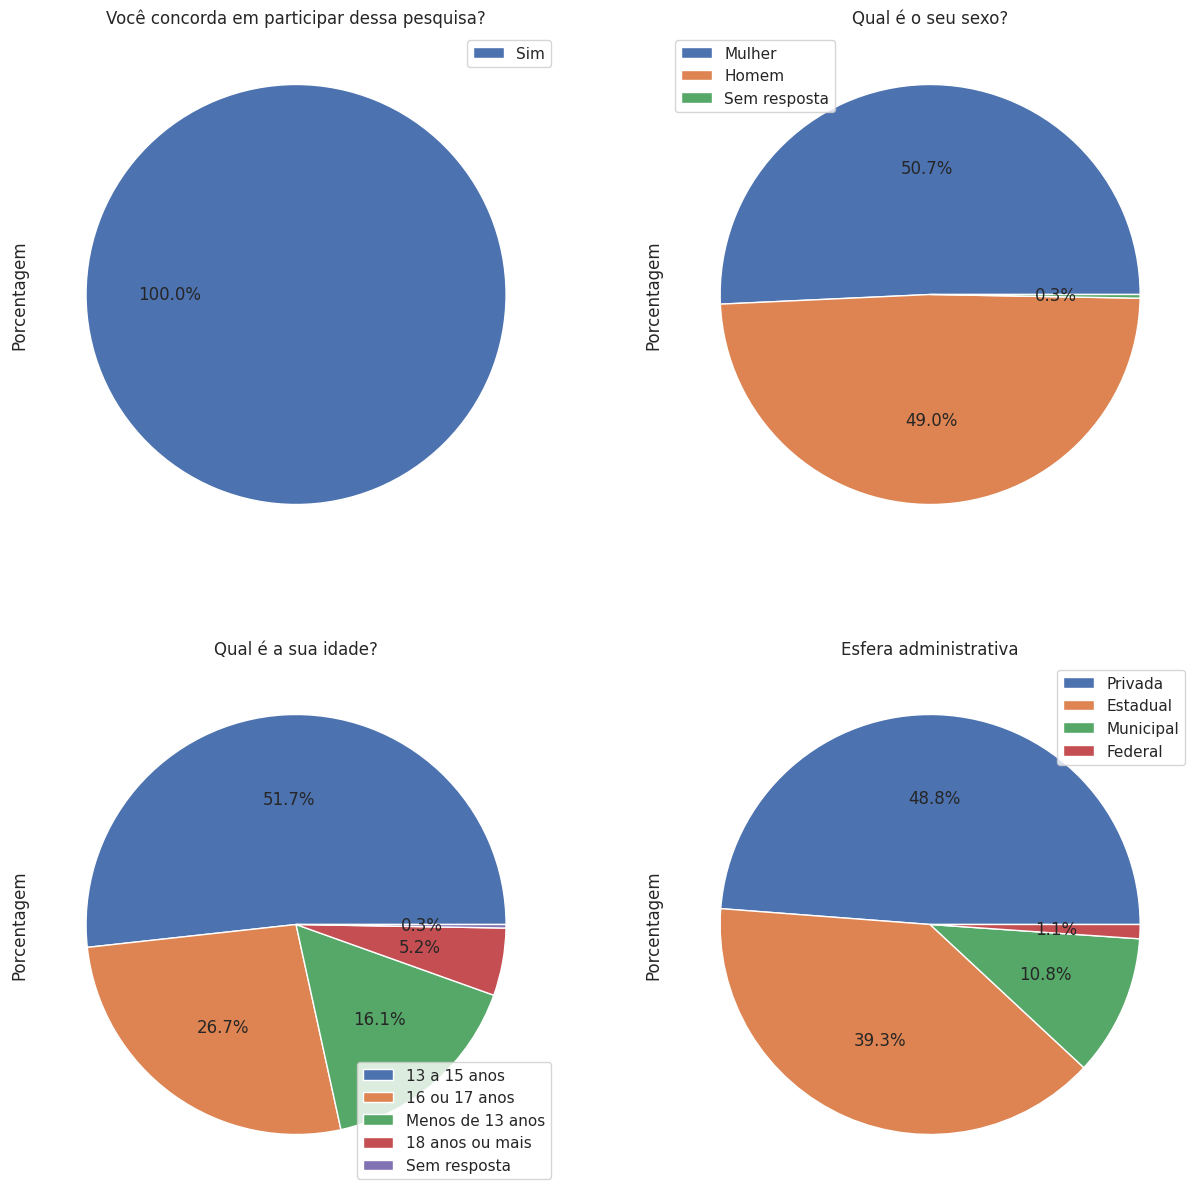

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plot_pie_pense(df, 'B00004', axes[0, 0])
plot_pie_pense(df, 'B01001A', axes[0, 1])
plot_pie_pense(df, 'B01003', axes[1, 0])
plot_pie_pense(df, 'ESFERA', axes[1, 1])
plt.show()

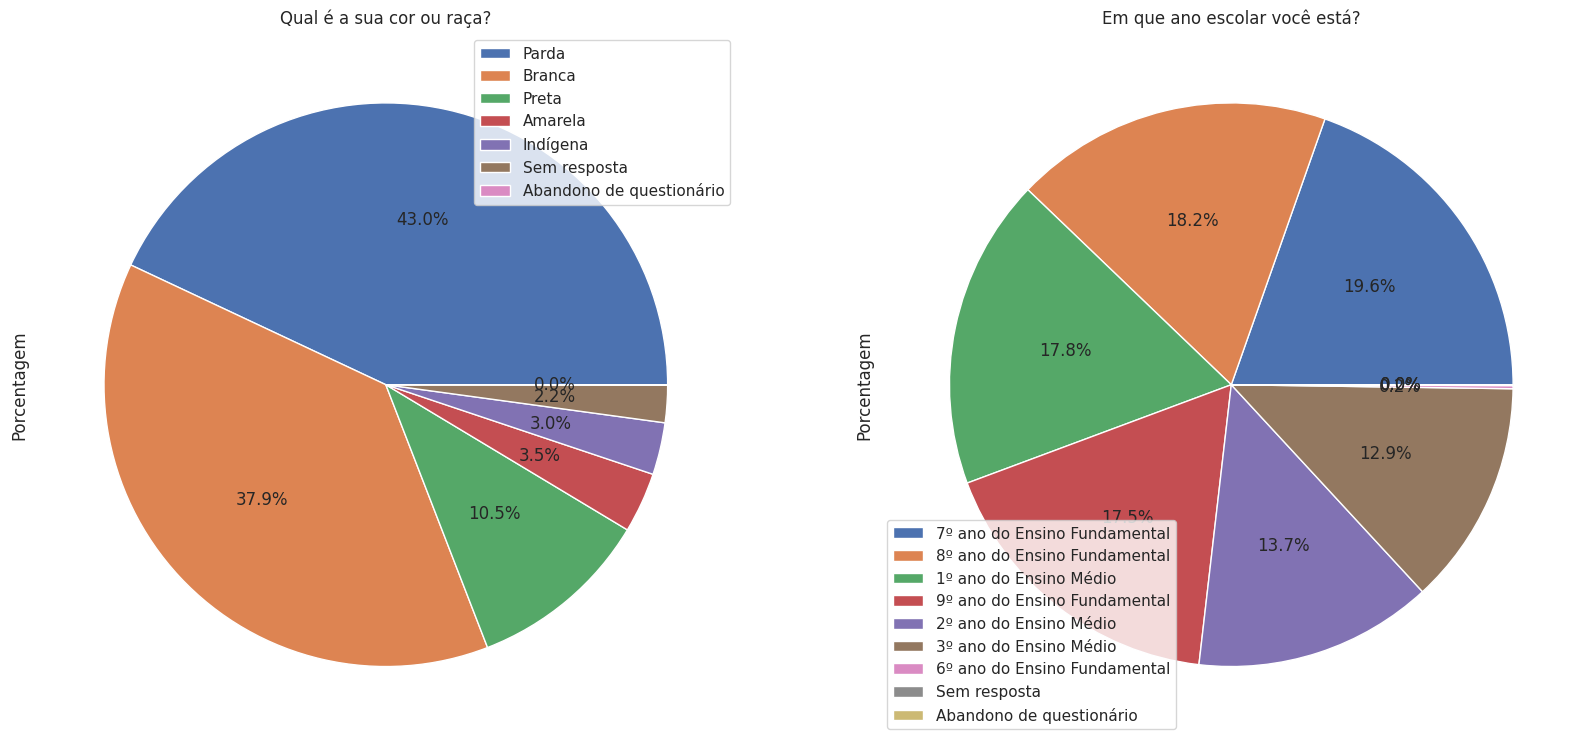

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
plot_pie_pense(df, 'B01002', axes[0])
plot_pie_pense(df, 'B01021A', axes[1])
plt.show()

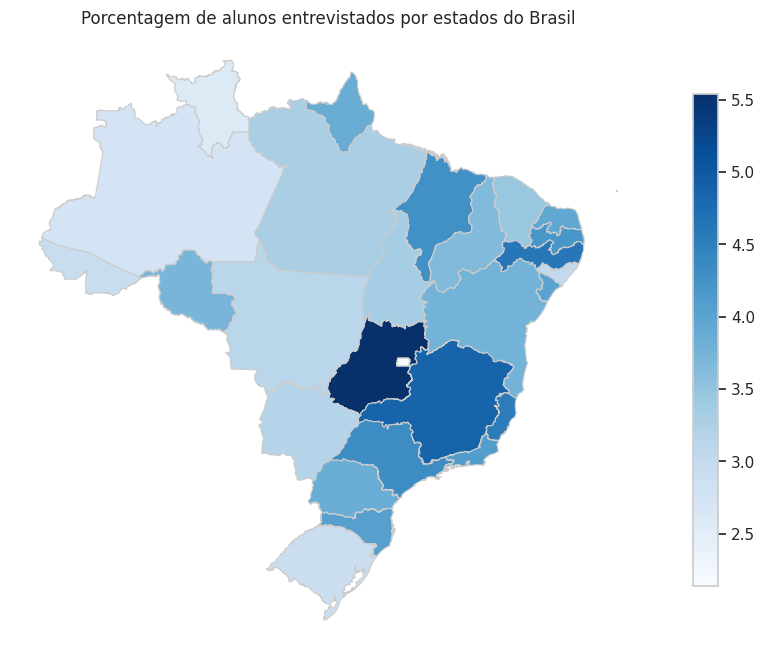

In [10]:
selected = df[['UF']].value_counts(normalize=True) * 100
selected.name = 'values'
plot_geopandas(selected, title="Porcentagem de alunos entrevistados por estados do Brasil", uf_key='UF')

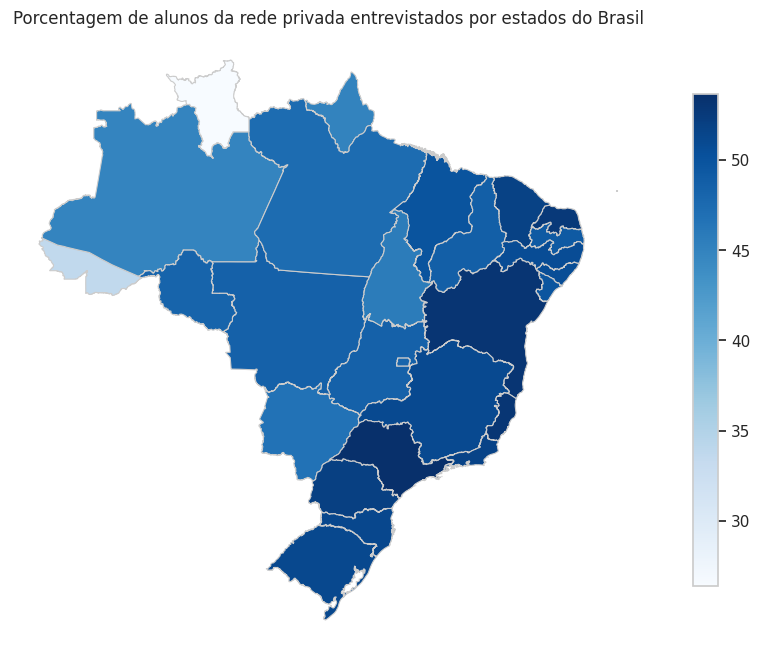

In [11]:
selected = df[['UF']][df['DEP_ADMIN'] == 2].value_counts() * 100 / df[['UF']].value_counts()
selected.name = 'values'
selected = selected.reset_index()
plot_geopandas(selected, title="Porcentagem de alunos da rede privada entrevistados por estados do Brasil", uf_key='UF')

# Análise Exploratória

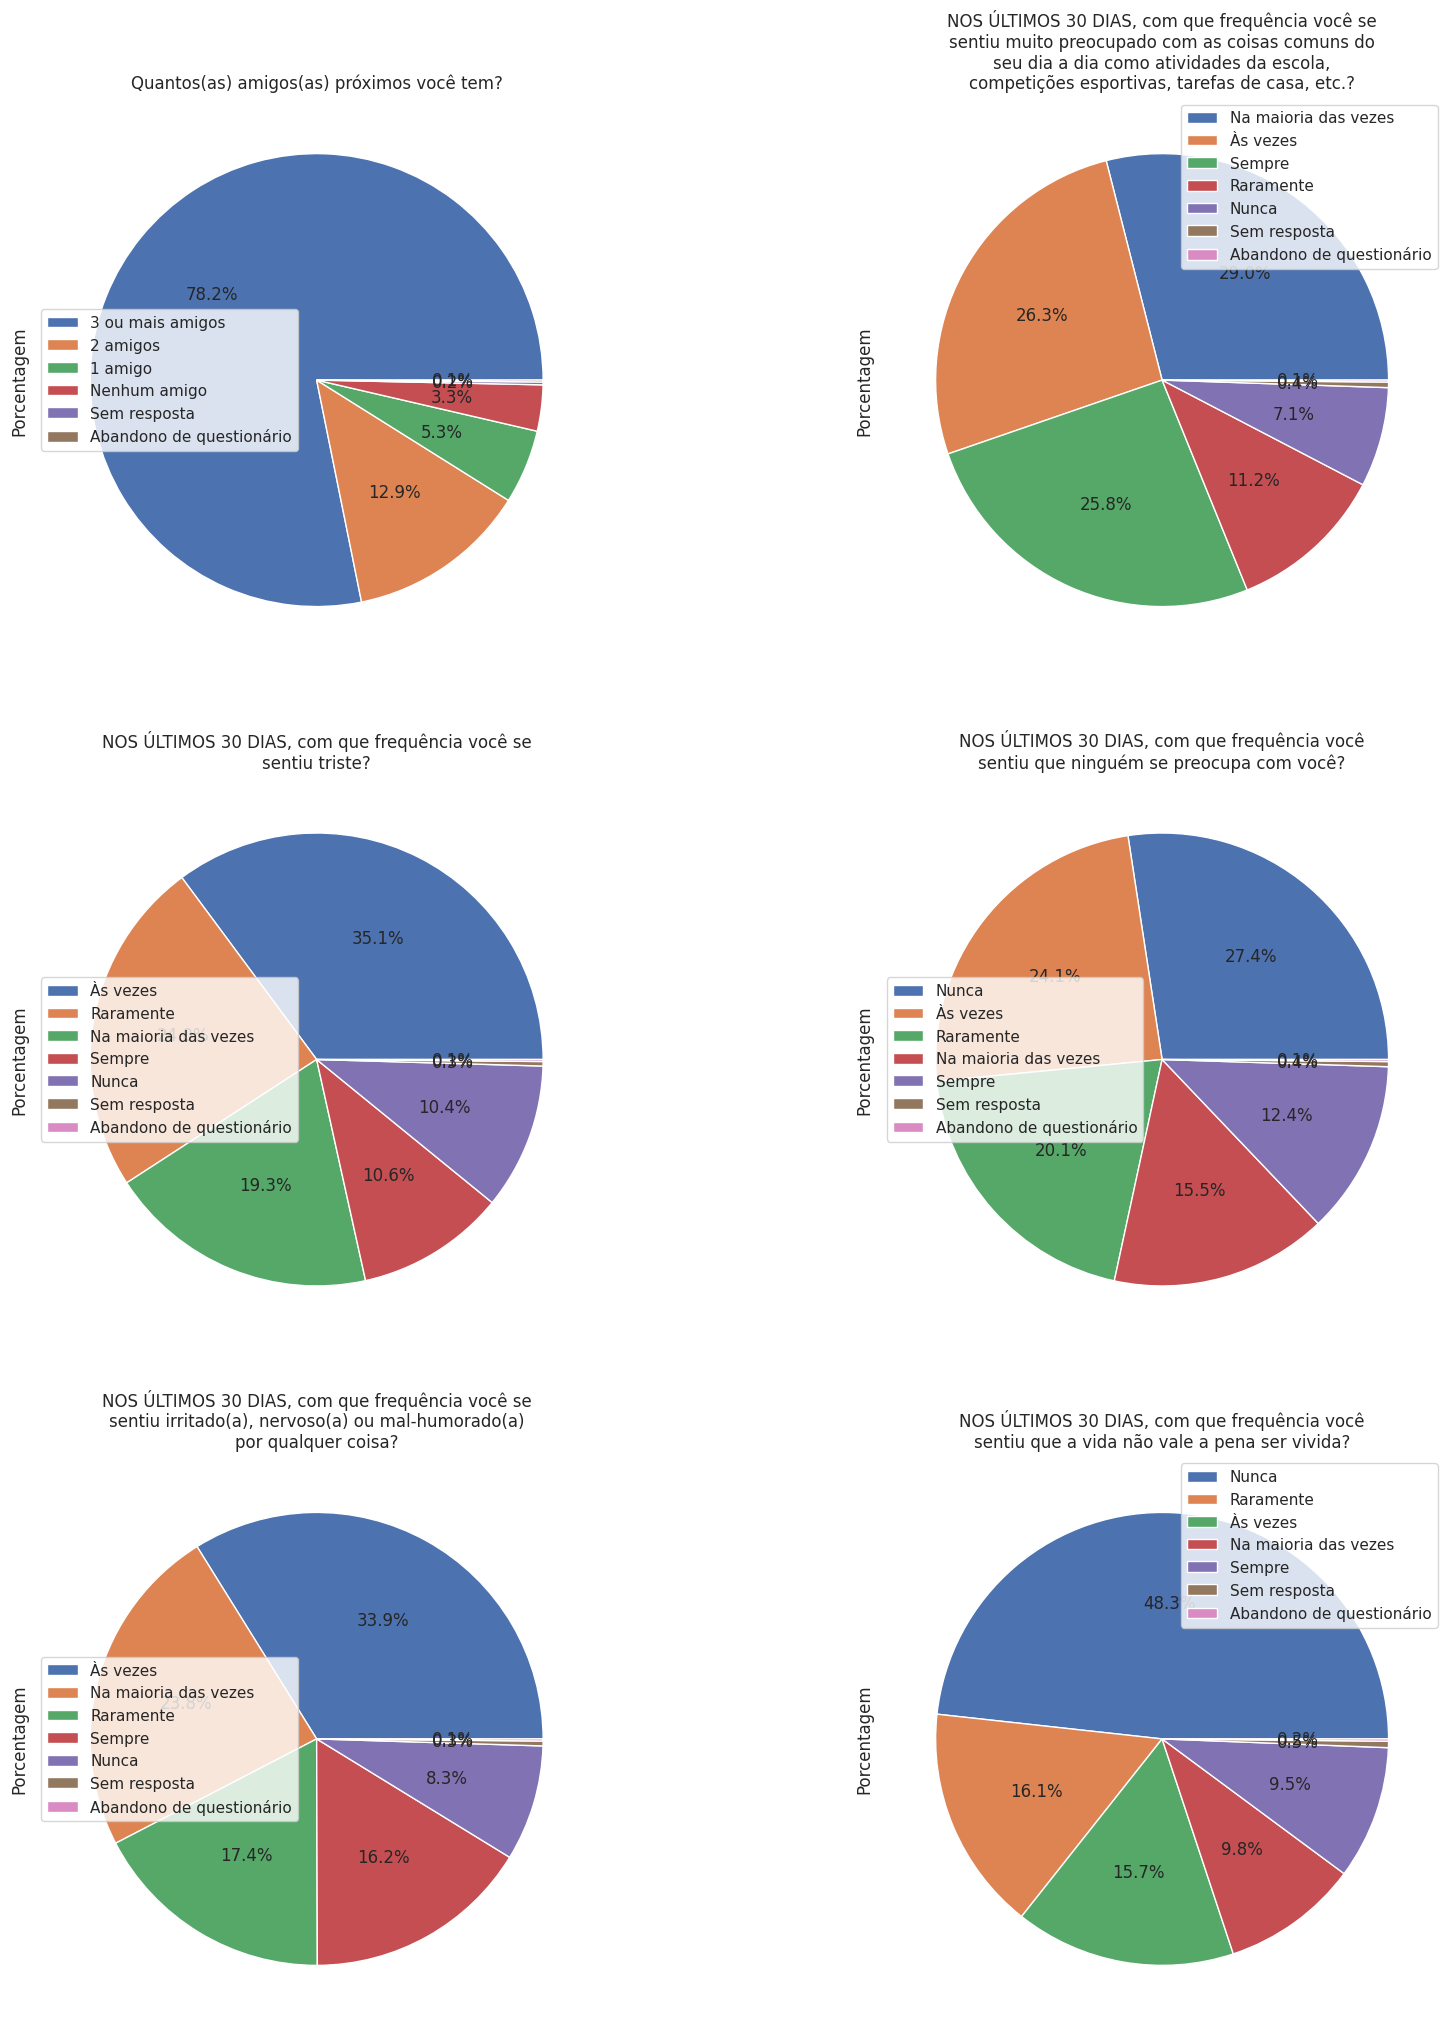

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(20, 25))
max_len = 50
plot_pie_pense(df, 'B12003', axes[0, 0], max_len_i=max_len)
plot_pie_pense(df, 'B12004', axes[0, 1], max_len_i=max_len)
plot_pie_pense(df, 'B12005', axes[1, 0], max_len_i=max_len)
plot_pie_pense(df, 'B12006', axes[1, 1], max_len_i=max_len)
plot_pie_pense(df, 'B12007', axes[2, 0], max_len_i=max_len)
plot_pie_pense(df, 'B12008', axes[2, 1], max_len_i=max_len)
plt.show()

# Ideias:
  - Verificar correlação entre a variaveis de saude mental
  - Verificar distribuição de alunos com potencial de depressão por estado brasileiro (filtrando por escolas estaduais) - verificar com IDH
  - Verificar distribuição de alunos com potencial de depressão por estado brasileiro (filtrando por escolas particulares) - verificar com IDH
  - Verificar distribuição de alunos com potencial de depressão por faixa etaria
  - Regressão logistica inicial (?)


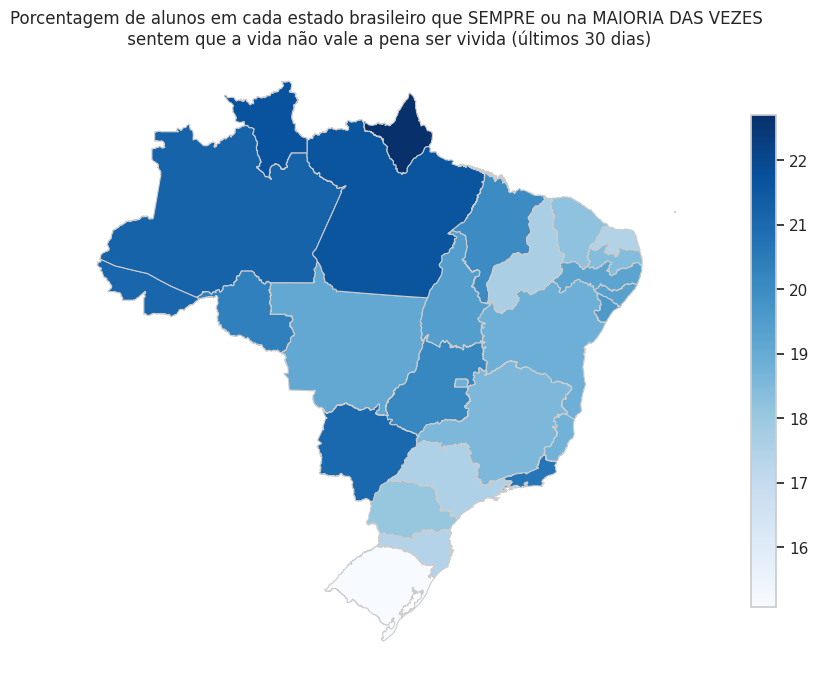

In [14]:
selected = df[['UF']][df['B12008'].isin([4.0, 5.0])].value_counts() * 100 / df[['UF']].value_counts()
selected.name = 'values'
selected = selected.reset_index()
plot_geopandas(selected, title="Porcentagem de alunos em cada estado brasileiro que SEMPRE ou na MAIORIA DAS VEZES\n sentem que a vida não vale a pena ser vivida (últimos 30 dias)", uf_key='UF')

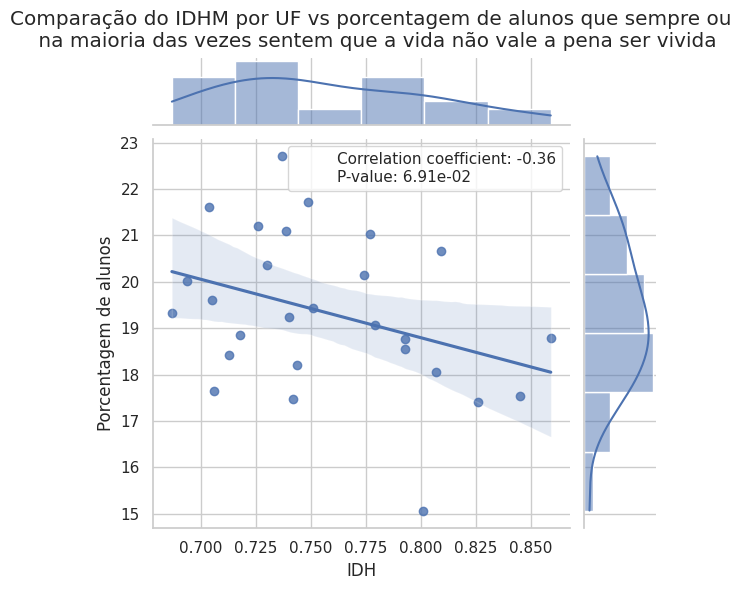

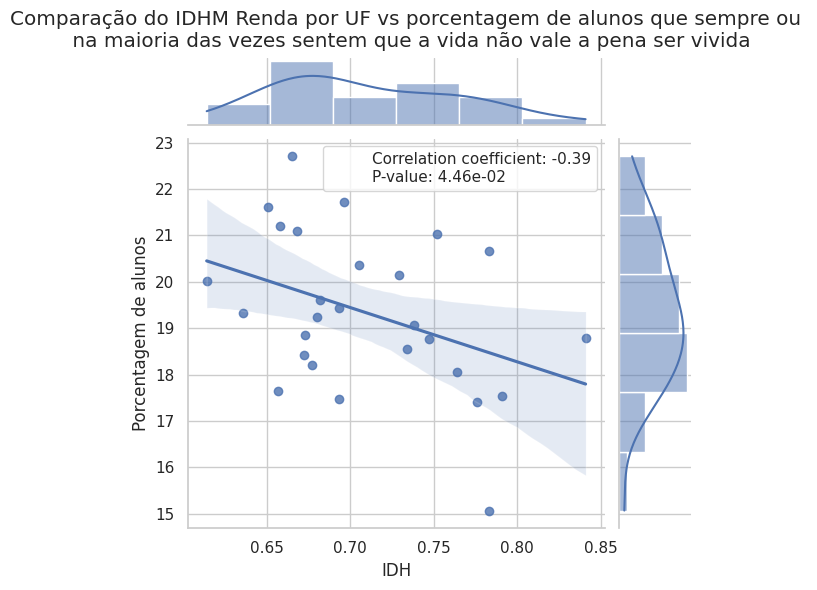

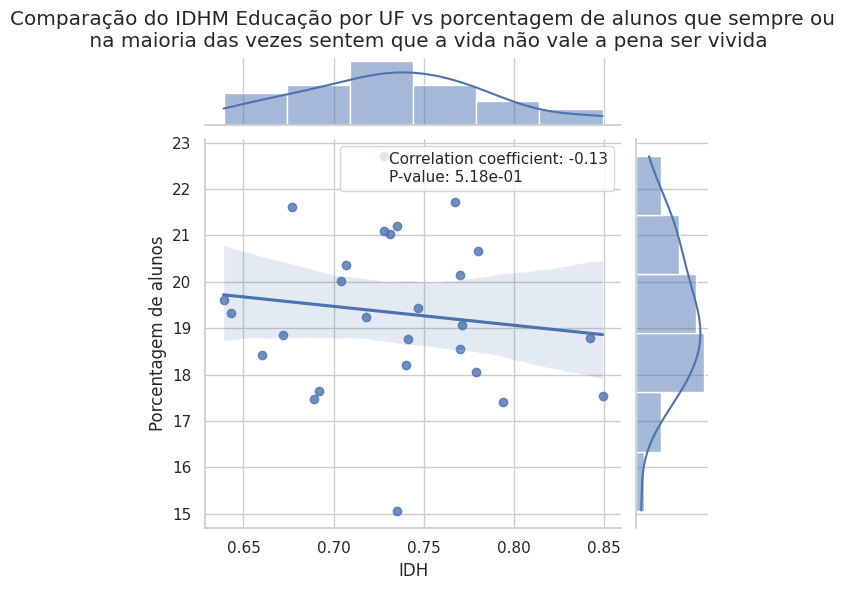

In [15]:
selected2 = BRAZIL_IDH.merge(selected, left_on='codigo_ibg', right_on='UF')
#display(selected2)
plot_correlation(selected2, x='IDHM', y='values',
                 title='Comparação do IDHM por UF vs porcentagem de alunos que sempre ou \n na maioria das vezes sentem que a vida não vale a pena ser vivida',
                 xlabel='IDH', ylabel='Porcentagem de alunos')

plot_correlation(selected2, x='IDHM Renda', y='values',
                 title='Comparação do IDHM Renda por UF vs porcentagem de alunos que sempre ou \n na maioria das vezes sentem que a vida não vale a pena ser vivida',
                 xlabel='IDH', ylabel='Porcentagem de alunos')

plot_correlation(selected2, x='IDHM Educação', y='values',
                 title='Comparação do IDHM Educação por UF vs porcentagem de alunos que sempre ou \n na maioria das vezes sentem que a vida não vale a pena ser vivida',
                 xlabel='IDH', ylabel='Porcentagem de alunos')